In [3]:
!pip install tensorflow==2.9.1
!pip install tqdm
!pip install pydicom


  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Using cached protobuf-3.20.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.


In [2]:
!pip install onnxruntime==1.13.1
!pip install onnx==1.12.0

In [10]:
!pip install tf2onnx

In [6]:
!pip install 'protobuf < 3.20.0' --force-reinstall

  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0


In [46]:
pip install --upgrade "protobuf<=3.20.0"

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip show protobuf

Name: protobuf
Version: 3.19.6
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: 3-Clause BSD License
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: onnx, onnxruntime, tensorboard, tensorflow, wandb


In [8]:
##
## Setting up Data location
##
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
import tensorflow 
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import keras
from keras import layers

#
# Note!! Anything with a path needs to be changed for one's own pc
# Changed the "/notebooks/..." for reduced_file_path and data = .pd.read_csv your own path
# If you are using paperspace this will however always function
#
data = pd.read_csv("/notebooks/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')

#
# The "data" variable selects either the Mass or Calc dataset
# 
print(data[data['Label'].str.contains("Calc")]) #Checking if it works
data = data[data['Label'].str.contains("Calc")] #Filtered for just Calc
#data = data[data['Label'].str.contains("Mass")] #Can pick Mass instead, comment Calc
##
## Note!! If used on one's own pc, change reduced_file_path
##
reduced_file_path =  '/notebooks/reduced_files_3565/'
#Figuring out where to extract data
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir(reduced_file_path + data['Label'].iloc[0])[0])


      Unnamed: 0  index                                      DCM_File_Path  \
0              0    531  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
1              1    145  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
2              2    229  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
3              3    419  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
4              4     39  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Test...   
...          ...    ...                                                ...   
1866        1866    873  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Trai...   
1867        1867   1005  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Trai...   
1868        1868   1273  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Trai...   
1869        1869   3238  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Trai...   
1870        1870   2882  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Calc-Trai...   

      DCM_File_Size                              Label  Number 

In [14]:
    # 
    # Data Processing
    #
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 299
    w = 299
    ch = 1



    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir(reduced_file_path + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(1)
        else:
            y_label.append(0)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)


  0%|          | 0/1871 [00:00<?, ?it/s]/tmp/ipykernel_326/148019414.py:71: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resize = img.resize((h,w), Image.LANCZOS)
100%|██████████| 1871/1871 [00:19<00:00, 96.45it/s] 


In [6]:
export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

SyntaxError: invalid syntax (3696076252.py, line 1)

In [5]:
#
# Will experiment with onnx models later
#
from onnx import hub
model = hub.load("resnet50")

In [12]:
#
# ResNet Set up
#
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2,EfficientNetB1,EfficientNetB2,InceptionResNetV2 	
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda, Concatenate, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import tf2onnx

#
# Onnx Testing
#

latent_dim = 128

# Define the input shape for grayscale images
input_shape = (299, 299, 1)

# Create an input layer for grayscale images
input_layer = Input(shape=input_shape)

# Repeat the single-channel input to create a 3-channel input
rgb_input = Concatenate()([input_layer, input_layer, input_layer])

# Load the InceptionResNetV2 model with modified input
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=rgb_input)

for layer in base_model.layers[:200]:
   layer.trainable = False
for layer in base_model.layers[200:]:
   layer.trainable = True
# Remove top layers (classification layers)
ResNet_features = base_model.get_layer('block17_8_ac').output

flaten = Dense(latent_dim, name='log_sigma')(Flatten()(ResNet_features))
# Model Construction
ResNet_Model = Model(input_layer, ResNet_features, name="encoder_model")
ResNet_Model.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 299, 299, 3)  0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)   

In [15]:
#
# Data augmentation
#
from keras.preprocessing.image import ImageDataGenerator

# Details of augmetation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Variables of augmentation

train_gen = datagen.flow(dcmMask,y_label,batch_size=1)
combinedImages = np.vstack((dcmMask,train_gen.x))
combinedYlabel = np.concatenate((y_label, train_gen.y), axis=0)
#
print('This is length of array: ',len(combinedYlabel))

This is length of array:  3742


In [16]:
#
# Classification Set up
#
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
#
# Classification Set up
#
ResNet_input = Input(shape=(h,w,ch))
ResNet_output = ResNet_Model(ResNet_input)

#Classification part
x = GlobalAveragePooling2D()(ResNet_output)
x = Dropout(0.4)(x) 
output_classify = Dense(2, activation='softmax')(x)  # Output layer


classification_model = Model(inputs=ResNet_input,outputs=output_classify)
classification_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 encoder_model (Functional)  (None, 17, 17, 1088)      13361888  
                                                                 
 global_average_pooling2d (G  (None, 1088)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 2)                 2178      
                                                                 
Total params: 13,364,066
Trainable params: 12,023,026
Non-trainable params: 1,341,040
_________________________________________

In [23]:
#
# Converting my classification model to onnx
#
input_signature = [tf.TensorSpec(shape=(None, 299, 299, 1), dtype=tf.float32, name='image_input')]
onnx_model, _  = tf2onnx.convert.from_keras(classification_model,input_signature, opset=13)
with open("my_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [25]:
#
# Verify the model
#
import onnx
onnx_model_path = "/notebooks/my_model.onnx"
onnx_model = onnx.load(onnx_model_path)


onnx.checker.check_model(onnx_model)


print(onnx.helper.printable_graph(onnx_model.graph))

graph tf2onnx (
  %image_input[FLOAT, unk__5453x299x299x1]
) initializers (
  %model/encoder_model/conv2d_99/Conv2D_weights_fused_bn[FLOAT, 192x160x7x1]
  %model/encoder_model/conv2d_99/Conv2D_bias_fused_bn[FLOAT, 192]
  %model/encoder_model/conv2d_98/Conv2D_weights_fused_bn[FLOAT, 160x128x1x7]
  %model/encoder_model/conv2d_98/Conv2D_bias_fused_bn[FLOAT, 160]
  %model/encoder_model/conv2d_97/Conv2D_weights_fused_bn[FLOAT, 128x1088x1x1]
  %model/encoder_model/conv2d_97/Conv2D_bias_fused_bn[FLOAT, 128]
  %model/encoder_model/conv2d_96/Conv2D_weights_fused_bn[FLOAT, 192x1088x1x1]
  %model/encoder_model/conv2d_96/Conv2D_bias_fused_bn[FLOAT, 192]
  %model/encoder_model/conv2d_95/Conv2D_weights_fused_bn[FLOAT, 192x160x7x1]
  %model/encoder_model/conv2d_95/Conv2D_bias_fused_bn[FLOAT, 192]
  %model/encoder_model/conv2d_94/Conv2D_weights_fused_bn[FLOAT, 160x128x1x7]
  %model/encoder_model/conv2d_94/Conv2D_bias_fused_bn[FLOAT, 160]
  %model/encoder_model/conv2d_93/Conv2D_weights_fused_bn[FLOAT, 

In [7]:
#
# Set up the split of Augmented images 50/50 as required of binary cross entropy
# Warning: Do not run this multiple times. 
#
X_train, X_test, y_train, y_test = train_test_split(combinedImages, combinedYlabel, test_size=0.50, random_state=1)

# Set up what appears to be a confusion matrix?
# Required for binary cross
from keras.utils import to_categorical
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
def lr_schedule(epoch):
    initial_lr = 0.000145  # Initial learning rate
    drop = 0.065     # Amount to drop the learning rate
    epochs_drop = 15   # Number of epochs after which to drop the learning rate

    lr = initial_lr * (1 / (1 + drop * epoch / epochs_drop))

    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=15,           
    restore_best_weights=True 
)

In [9]:
classification_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 encoder_model (Functional)  (None, 17, 17, 1088)      13361888  
                                                                 
 global_average_pooling2d (G  (None, 1088)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 2)                 2178      
                                                                 
Total params: 13,364,066
Trainable params: 12,023,026
Non-trainable params: 1,341,040
_________________________________________

In [10]:
#import tensorflow as tf
#tf.keras.applications.__dict__

In [11]:
import tensorflow as tf

classification_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000145), metrics=['accuracy'])

In [12]:
classification_model.fit(X_train, y_train, epochs=100, batch_size=50, callbacks=[lr_scheduler,early_stopping], validation_data=(X_test, y_test))

Epoch 1/100
38/38 [==============================] - 36s 603ms/step - loss: 0.6170 - accuracy: 0.6366 - val_loss: 0.5821 - val_accuracy: 0.6681 - lr: 1.4500e-04
Epoch 2/100
38/38 [==============================] - 18s 468ms/step - loss: 0.4914 - accuracy: 0.7461 - val_loss: 0.5192 - val_accuracy: 0.7055 - lr: 1.4437e-04
Epoch 3/100
38/38 [==============================] - 18s 469ms/step - loss: 0.4000 - accuracy: 0.7948 - val_loss: 0.5776 - val_accuracy: 0.7296 - lr: 1.4375e-04
Epoch 4/100
38/38 [==============================] - 18s 472ms/step - loss: 0.3048 - accuracy: 0.8658 - val_loss: 0.8734 - val_accuracy: 0.7381 - lr: 1.4314e-04
Epoch 5/100
38/38 [==============================] - 18s 470ms/step - loss: 0.1586 - accuracy: 0.9498 - val_loss: 0.6318 - val_accuracy: 0.7814 - lr: 1.4253e-04
Epoch 6/100
38/38 [==============================] - 18s 471ms/step - loss: 0.0699 - accuracy: 0.9802 - val_loss: 0.5808 - val_accuracy: 0.8215 - lr: 1.4192e-04
Epoch 7/100
38/38 [===============

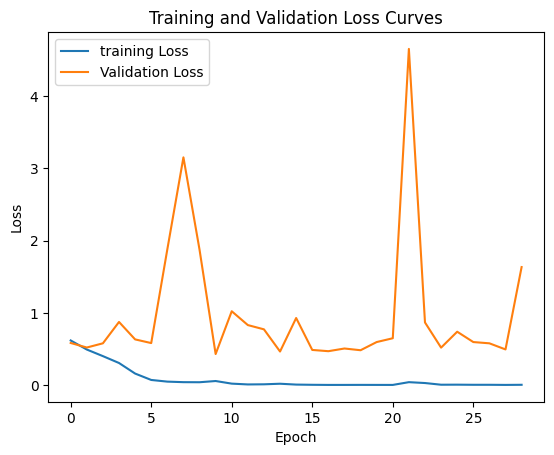

In [13]:
    #
    # Results of the classification
    # 
    plt.plot(classification_model.history.history['loss'], label='training Loss')
    plt.plot(classification_model.history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

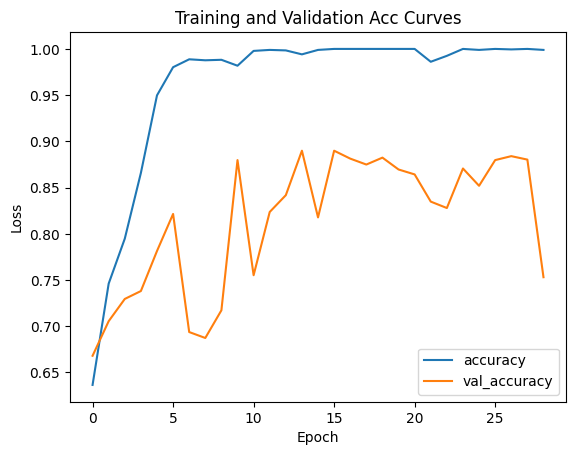

In [14]:
    plt.plot(classification_model.history.history['accuracy'], label='accuracy')
    plt.plot(classification_model.history.history['val_accuracy'], label='val_accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Acc Curves')
    plt.legend()
    plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(combinedImages , combinedYlabel, test_size=0.33, random_state=1)

X_train_encode = classification_model.predict(X_train)
X_test_encode = classification_model.predict(X_test)

39/39 [==============================] - 4s 115ms/step


In [24]:
#In order to keep the dataset the same for the model loader
np.save('X_train_encode_model_Example.npy', X_train_encode)
np.save('X_test_encode_model_Example.npy', X_test_encode)
np.save('y_train_example.npy', y_train)